In [27]:
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
import matplotlib.pyplot  as plt
from matplotlib import cm
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('dataset/df.csv')
area = pd.read_csv('dataset/area.csv')

In [12]:
df_x = df.drop(['Unnamed: 0', '상권_코드_명'], axis=1)
df_y = df['상권_코드_명']

### K-means

In [196]:
kmeans = KMeans(n_clusters=3, max_iter=500)

cluster = kmeans.fit_transform(df_x)
centers_df = kmeans.cluster_centers_

display(centers_df, kmeans.labels_)

array([[ 1.49737533e+00,  1.51443570e+00,  9.97375328e-02,
         5.70866142e-01,  2.40288714e+00,  1.01049869e-01,
         1.70603675e-02,  3.25459318e-01,  2.62467192e-03,
         5.44619423e-01,  2.62467192e-03,  0.00000000e+00,
         2.62467192e-03,  5.62992126e-01,  1.99737533e+00],
       [ 2.35181644e-01,  3.57552581e-01,  1.33843212e-02,
         9.17782027e-02,  5.00956023e-01,  4.78011472e-02,
         9.56022945e-03,  1.75908222e-01, -8.67361738e-19,
         1.35755258e-01,  1.91204589e-03,  0.00000000e+00,
         4.33680869e-19,  1.64435946e-01,  3.97705545e-01],
       [ 1.69060773e+00,  1.37569061e+00,  2.15469613e-01,
         3.31491713e-01,  1.82872928e+00,  2.46961326e+00,
         1.10497238e-02,  2.32044199e-01,  1.51788304e-18,
         3.25966851e-01,  1.10497238e-02,  0.00000000e+00,
         5.52486188e-03,  5.08287293e-01,  2.22099448e+00]])

array([1, 1, 1, ..., 0, 0, 1])

c:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


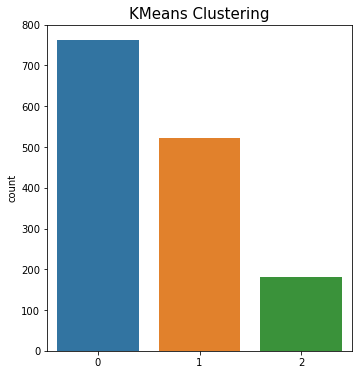

In [197]:
plt.figure(figsize=(12, 6))

# 군집별로 어떻게 분류했는가를 시각화
plt.subplot(1,2,1)
sns.countplot(kmeans.labels_)
plt.title("KMeans Clustering", fontsize=15)

plt.show()

### DBSCAN

In [198]:
dbscan = DBSCAN(eps=0.5, min_samples=1)

dbscan_data = dbscan.fit_predict(df_x)
dbscan_data

array([  0,   1,   2, ..., 949, 950,   2], dtype=int64)

### 평가

In [199]:
from sklearn.metrics import silhouette_score, silhouette_samples

In [200]:
score = silhouette_score(df_x, kmeans.labels_)
score2 = silhouette_score(df_x, dbscan_data)
display(score, score2)

0.28423629976737586

0.465893587994543

In [106]:
samples = silhouette_samples(df_x, kmeans.labels_)
samples2 = silhouette_samples(df_x, dbscan_data)
display(samples, samples2)

array([-0.1286849 , -0.03887943,  0.68352101, ...,  0.05400028,
        0.08194478,  0.68352101])

array([0., 1., 1., ..., 0., 0., 1.])

### num_cluster, eps 변화에 따른 score

In [210]:
def plot_silhouette(X, num_cluesters, epss):
    for n_clusters, eps in zip(num_cluesters, epss):
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    
        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=10)
        cluster_labels = clusterer.fit_predict(X)
    
        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)
    
        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)
    
        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]
    
            ith_cluster_silhouette_values.sort()
    
            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i
    
            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)
    
            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    
            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples
    
        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")
    
        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    
        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        
        #----------------------------------------------------------
        
        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax2.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax2.set_ylim([0, len(X) + (eps + 1) * 10])
    
        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = DBSCAN(eps=eps, min_samples=1)
        cluster_labels = clusterer.fit_predict(X)
    
        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For eps =", eps, "The average silhouette_score is :", silhouette_avg)
    
        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)
    
        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]
    
            ith_cluster_silhouette_values.sort()
    
            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i
    
            color = cm.nipy_spectral(float(i) / float(eps))
            ax2.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)
    
            # Label the silhouette plots with their cluster numbers at the middle
            ax2.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    
            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples
    
        ax2.set_title("The silhouette plot for the various clusters.")
        ax2.set_xlabel("The silhouette coefficient values")
        ax2.set_ylabel("Cluster label")
    
        # The vertical line for average silhouette score of all the values
        ax2.axvline(x=silhouette_avg, color="red", linestyle="--")
    
        ax2.set_yticks([])  # Clear the yaxis labels / ticks
        ax2.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    
        # 2nd Plot showing the actual clusters formed
        # colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        
        # ax2.scatter(X.iloc[:, 0], X.iloc[:, 1]#, X.iloc[:, 2], X.iloc[:, 3], X.iloc[:, 4], X.iloc[:, 5], X.iloc[:, 6], X.iloc[:, 7],
        #             # X.iloc[:, 8], X.iloc[:, 9], X.iloc[:, 10], X.iloc[:, 11], X.iloc[:, 12], X.iloc[:, 13], X.iloc[:, 14]
        #             , marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k'
        #             )
    
        # # Labeling the clusters
        # centers = clusterer.cluster_centers_
        # # Draw white circles at cluster centers
        # ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
        #             c="white", alpha=1, s=200, edgecolor='k')
    
        # for i, c in enumerate(centers):
        #     ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
        #                 s=50, edgecolor='k')
    
        # ax2.set_title("The visualization of the clustered data.")
        # ax2.set_xlabel("Feature space for the 1st feature")
        # ax2.set_ylabel("Feature space for the 2nd feature")
    
        plt.suptitle(("Silhouette analysis for KMeans / DBSCAN clustering on sample data "
                      f'with n_clusters = {n_clusters} with eps = {eps}'),
                     fontsize=14, fontweight='bold')
    
        plt.show() 

In [211]:
df_x.shape
len(df_x)

1466

For n_clusters = 2 The average silhouette_score is : 0.2879691707828513
For eps = 0.1 The average silhouette_score is : 0.465893587994543


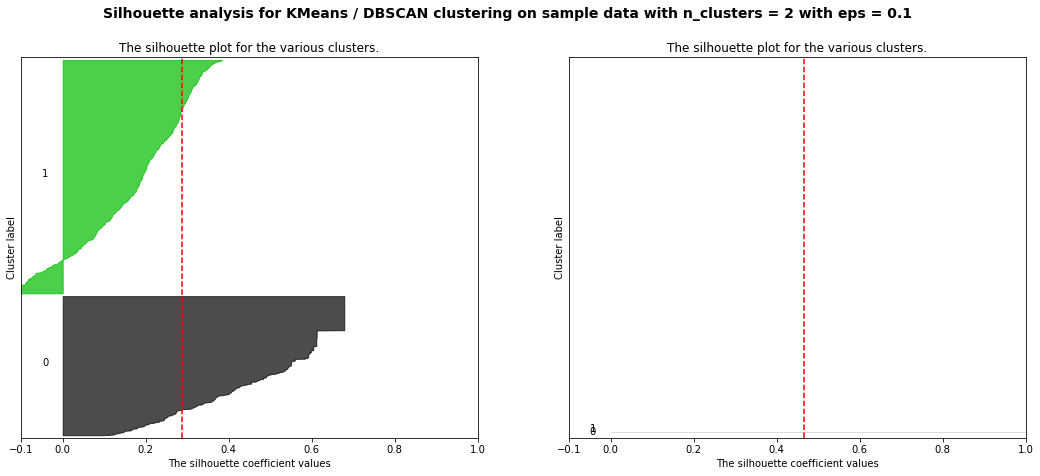

For n_clusters = 3 The average silhouette_score is : 0.28423629976737586
For eps = 0.3 The average silhouette_score is : 0.465893587994543


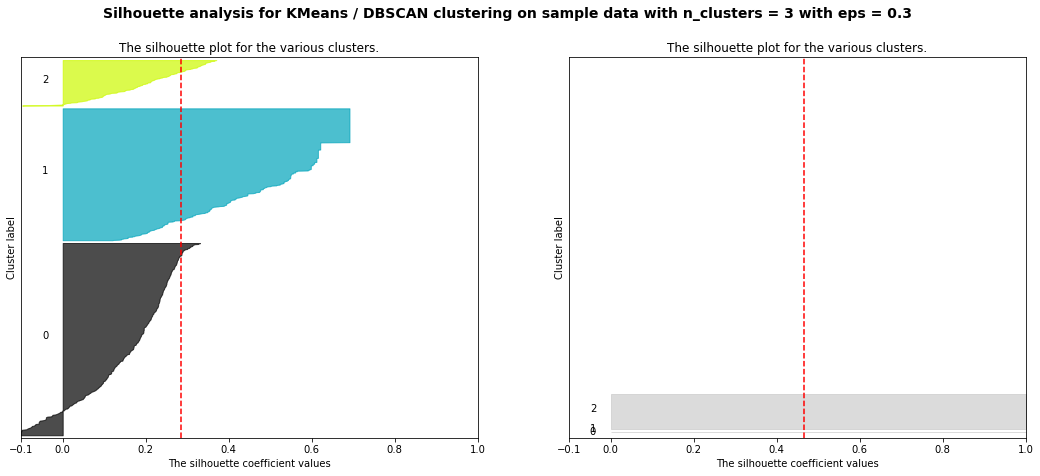

For n_clusters = 4 The average silhouette_score is : 0.2608807851902431
For eps = 0.5 The average silhouette_score is : 0.465893587994543


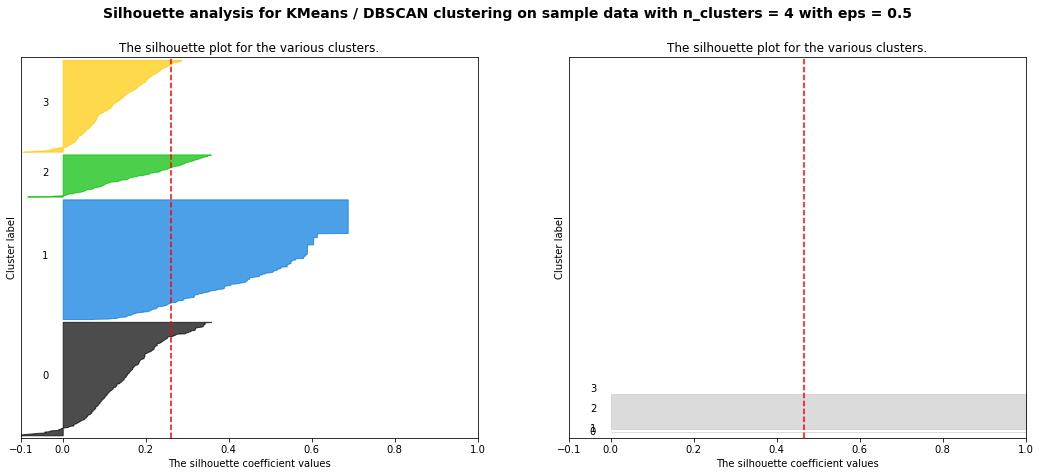

For n_clusters = 5 The average silhouette_score is : 0.26586599791362114
For eps = 0.6 The average silhouette_score is : 0.465893587994543


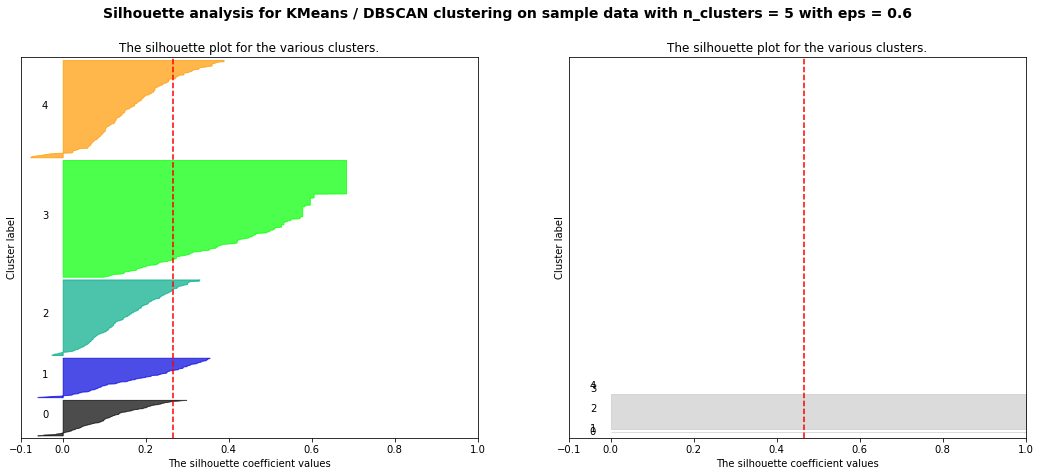

For n_clusters = 6 The average silhouette_score is : 0.22485151805392736
For eps = 0.7 The average silhouette_score is : 0.465893587994543


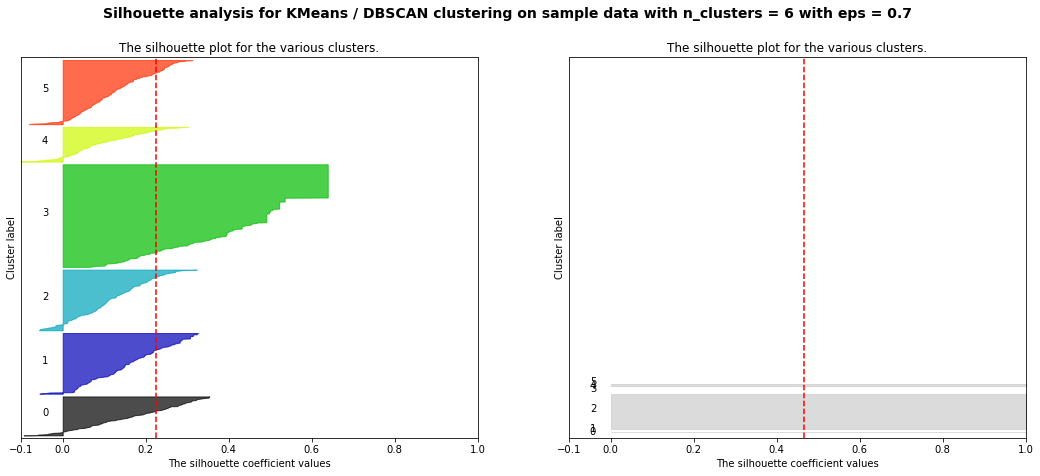

For n_clusters = 7 The average silhouette_score is : 0.22869835964733376
For eps = 0.9 The average silhouette_score is : 0.465893587994543


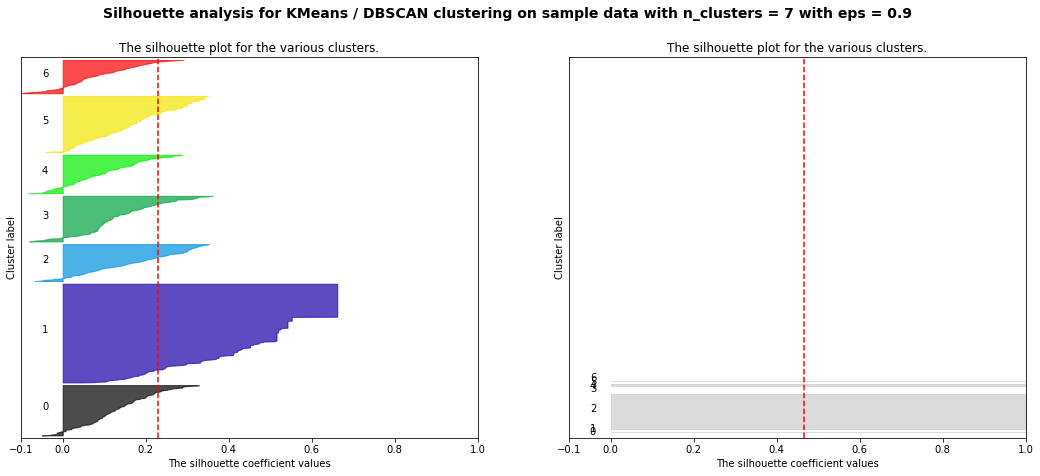

In [212]:
plot_silhouette(df_x, [2,3,4,5,6,7], [0.1, 0.3, 0.5, 0.6 ,0.7, 0.9])